In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier as RFC

In [2]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df['Age'].fillna(df['Age'].mean()).loc[5]

29.69911764705882

In [4]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df['Embarked'].mode().loc[0]

'S'

In [7]:
df['Embarked'].fillna(df['Embarked'].mode().loc[0], inplace=True)

In [8]:
df_casted = df.replace({'Sex': {'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}})

In [10]:
df_casted.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


In [11]:
df.shape[0]

891

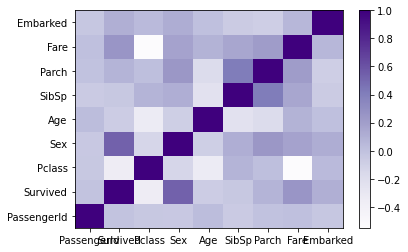

In [17]:
plt.pcolor(df_casted.corr(), cmap=plt.cm.Purples)
plt.xticks(ticks=np.arange(df_casted.corr().shape[1])+0.5, labels=df_casted.corr().columns)
plt.yticks(ticks=np.arange(df_casted.corr().shape[0])+0.5, labels=df_casted.corr().columns)
plt.colorbar()
plt.show()

In [18]:
import seaborn as sb

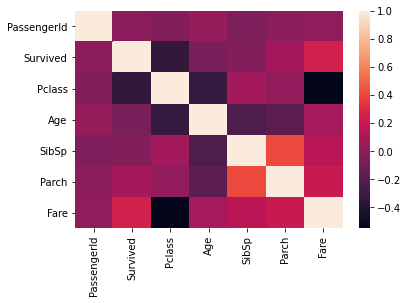

In [19]:
plt.figure()
sb.heatmap(df.corr())
plt.show()

In [13]:
df.replace({'Sex': {'male':0, 'female':1}, 'Embarked': {'S':0, 'C':1, 'Q':2}})

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C148,1


In [14]:
data = df_casted[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

In [15]:
data2 = data[['Pclass', 'Sex', 'Fare']]
label = df['Survived']

In [16]:
clf1 = SVC()
clf2 = RFC()

In [20]:
scores1 = cross_val_score(clf1, data2, label, cv=5)
scores2 = cross_val_score(clf2, data2, label, cv=5)

In [21]:
score1 = np.mean(scores1)
score2 = np.mean(scores2)

In [22]:
score1

0.6678865105768628

In [23]:
score2

0.8002950222835981

In [24]:
clf3 = RFC(max_depth=5, n_estimators=100, criterion='entropy')
scores3 = cross_val_score(clf3, data2, label, cv=5)
score3 = np.mean(scores3)
print(score3)

0.8036407005209968


In [26]:
max_depth = [1,2,5,10]
n_estimators = [1,10,20,50,100]
best_score = 0

for i in max_depth:
    for j in n_estimators:
        clf4 = RFC(max_depth=i, n_estimators=j)
        scores4 = cross_val_score(clf4, data2, label, cv=5)
        score4 = np.mean(scores4)
        if score4 > best_score:
            best_score = score4
            best_prm = {'max_depth': i, 'n_estimators': j}

print(f"Best score: {best_score:.3f}")
print(f"Best parameter: {best_prm}")

Best score: 0.814
Best parameter: {'max_depth': 10, 'n_estimators': 50}


In [36]:
from sklearn.model_selection import train_test_split

In [43]:
train_d, test_d, train_l, test_l = train_test_split(data2, label, test_size=0.3)
clf4.fit(train_d, train_l)
importances = clf4.feature_importances_
features = train_d.columns

In [41]:
idx = np.argsort(importances, axis=0)
idx

array([0, 1, 2])

In [44]:
features

Index(['Pclass', 'Sex', 'Fare'], dtype='object')

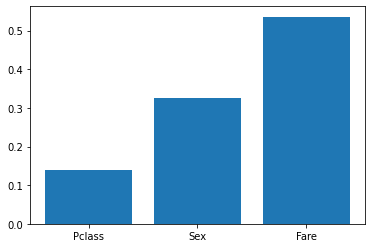

In [48]:
plt.bar(range(len(idx)), importances[idx])
plt.xticks(range(len(idx)), features[idx])
plt.show()